In [18]:
from deepface import DeepFace 
import cv2
from matplotlib import pyplot as plt
import random as rd
import os
import time


In [36]:
img_path1 = 'images/190311.jpg'
img_path2 = 'images/conor1.jpg'

In [37]:
try:
  img1 = DeepFace.detectFace(img_path1)
  img2 = DeepFace.detectFace(img_path2)
except:
  raise Exception("Face couldn't detected")

⚠️ Function detectFace is deprecated. Use extract_faces instead.
⚠️ Function detectFace is deprecated. Use extract_faces instead.


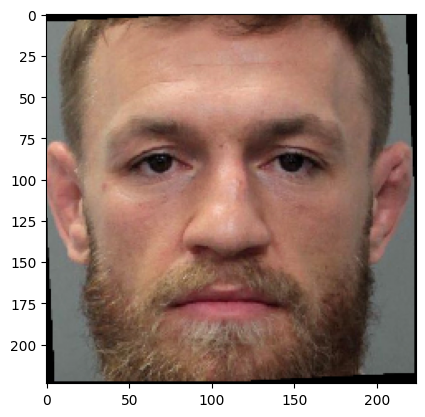

In [38]:
plt.imshow(img1)


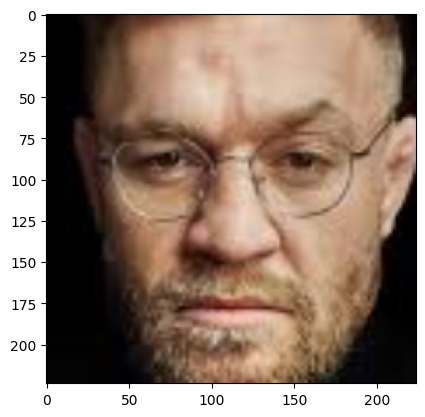

In [39]:
plt.imshow(img2)


In [40]:
res = DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='Facenet')

In [41]:
print(res)

{'verified': True, 'distance': 0.3868532256617869, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 901, 'y': 232, 'w': 721, 'h': 721}, 'img2': {'x': 50, 'y': 41, 'w': 106, 'h': 106}}, 'time': 1.84}


In [14]:

if os.path.exists('representations_vgg_face.pkl') == False:
  dfs = DeepFace.find(img_path1, db_path='images')
else:
  os.remove('representations_vgg_face.pkl')

Finding representations: 100%|██████████| 7/7 [01:19<00:00, 11.33s/it]


Representations stored in images/representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  86.41981530189514  seconds


In [15]:
print(dfs)

[                identity  source_x  source_y  source_w  source_h  \
0      images/190311.jpg       901       232       721       721   
1      images/july21.jpg       901       232       721       721   
2  images/1246774488.jpg       901       232       721       721   

   VGG-Face_cosine  
0     5.551115e-16  
1     1.286684e-01  
2     3.130004e-01  ]
